<a href="https://colab.research.google.com/github/riyanagpal24/BreastCancer-SVM/blob/master/Breast_cancer_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

---

Expolatory Analysis

In [0]:
data = pd.read_csv("breast-cancer.csv")

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.shape

(569, 32)

In [11]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [13]:
pd.isnull(data).any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

---

Data pre-processing

In [0]:
#data = data.drop('Unnamed: 32', axis = 1)

In [0]:
data = data.set_index('id')

In [0]:
data.diagnosis.replace(to_replace=dict(B=0, M=1), inplace = True)

In [17]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


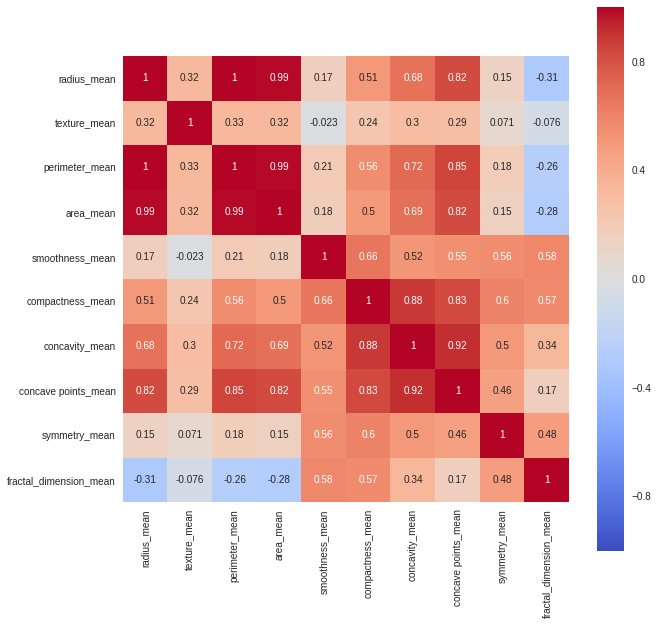

In [18]:
#Attribute corelation

# red suggests that attributes are correlated with each other. 
# yellow and green suggest some moderate correlation
# blue shows negative correlations.
from matplotlib import cm as cm

features_mean= list(data.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [0]:
target = np.array(data['diagnosis'])

In [0]:
cancer = data.drop('diagnosis', axis = 1)

In [0]:
feature_name = np.array(list(cancer))
cancer = np.array(cancer)
target_names = np.array(['malignant', 'benign'])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(cancer, target, test_size = 0.20, random_state = 0) #random =0-42-21 for resuability

---

Algorithm Tuning

In [27]:
svm = SVC()
svm.fit(x_train, y_train)
print("Accuracy on the training subset {:.3f}".format(svm.score(x_train, y_train))) # 100 : signifies we are over fitting the data
print("Accuracy on the test subset {:.3f}".format(svm.score(x_test, y_test)))  

Accuracy on the training subset 1.000
Accuracy on the test subset 0.588


'\nlarge diff between the max and min value of each feature. A diff in order of mangnitude.\n'

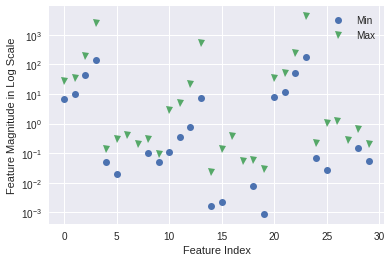

In [28]:
plt.plot(x_train.min(axis=0), 'o', label='Min')
plt.plot(x_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')


'''
large diff between the max and min value of each feature. A diff in order of mangnitude.
'''

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [0]:
#data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

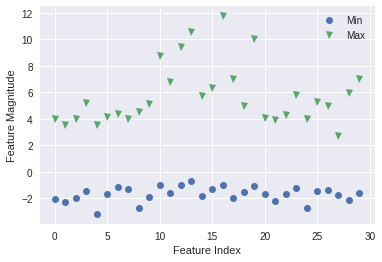

In [32]:
plt.plot(rescaledX.min(axis=0), 'o', label='Min')
plt.plot(rescaledX.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude')
plt.legend(loc='upper right')

#not much of a large difference between the min and max values

In [33]:
svm2 = SVC(C = 2.0)
svm2.probability = True
svm2.fit(rescaledX, y_train)
print("Accuracy on the training subset {:.3f}".format(svm2.score(rescaledX, y_train)))
print("Accuracy on the training subset {:.3f}".format(svm2.score(X_test_scaled, y_test)))

Accuracy on the training subset 0.989
Accuracy on the training subset 0.982


In [34]:
#calculated probability for both class[0,1]
print('Predicted probabilities for the samples (malignant and benign):\n\n{}\n\n'.format(svm2.predict_proba(X_test_scaled[:10])))

# 1 malignant 0 benign
svm2.predict(X_test_scaled)

Predicted probabilities for the samples (malignant and benign):

[[4.20898948e-06 9.99995791e-01]
 [9.55582594e-01 4.44174061e-02]
 [9.98283261e-01 1.71673896e-03]
 [9.73747996e-01 2.62520038e-02]
 [9.98515781e-01 1.48421859e-03]
 [9.99159194e-01 8.40805641e-04]
 [9.99552796e-01 4.47204148e-04]
 [9.98657964e-01 1.34203556e-03]
 [9.89095359e-01 1.09046412e-02]
 [9.97366911e-01 2.63308868e-03]]




array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# accuracy of the model
print("Accuracy score %f" % accuracy_score(y_test, svm2.predict(X_test_scaled)))


print(classification_report(y_test, svm2.predict(X_test_scaled)))


Accuracy score 0.982456
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        67
          1       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       114



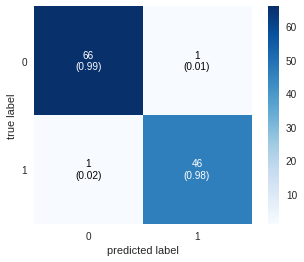

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_confusion_matrix

#to check cases of miss-classification

binary = confusion_matrix(y_test, svm2.predict(X_test_scaled))

#in table format
pd.crosstab(y_test, svm2.predict(X_test_scaled), rownames=['True'], colnames=['Predicted'], margins=True)

fig , ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()